In [165]:
%matplotlib inline

In [166]:
import os
import sys
import abc
import inspect
import argparse
import numpy as np
import pandas as pd
import sklearn.datasets as skd
import sklearn.cluster as skc
import sklearn.metrics as skm
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn

In [167]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics
from scipy.spatial.distance import cdist
from copy import deepcopy
from matplotlib.patches import Ellipse

In [168]:
module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath(os.path.join('./../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [169]:
# warnings.filterwarnings("ignore")

In [170]:
from dfncluster.dFNC import dFNC
from dfncluster.Classifiers import Polyssifier
from dfncluster.Clusterer import KMeansClusterer,Clusterer
from dfncluster.Dataset import FNCDataset

In [171]:
from data.SklearnDatasets import Iris, Classification, MNIST, Moons

In [172]:
ALLOWED_KWARGS = [
    'n_clusters',
    'init',
    'n_init',
    'max_iter',
    'tol',
    'precompute_distances',
    'verbose',
    'random_state',
    'copy_x',
    'n_jobs',
    'algorithm'
]
DATASETS = dict(
    iris=Iris.make,
    classification=Classification.make,
    mnist=MNIST.make,
    moons=Moons.make
)
METRICS = [
    'calinksi_harabaz',
    'davies_bouldin',
    'silhouette',
    # 'mean_euclid',
    # 'mean_city',
]
metrics=",".join(METRICS)
print("metrics:",metrics)
dataset='iris'
dataset = DATASETS[dataset.lower()]()

metrics: calinksi_harabaz,davies_bouldin,silhouette
load_iris
Feature Shape (150, 4)
Label Shape (150, 1)


In [173]:
print("dataset:",dataset)

dataset: <dfncluster.Dataset.SklearnDataset.SklearnDataset object at 0x7f3635468910>


In [174]:
print("dataset.features:",dataset.features)

dataset.features: [[6.3 3.3 4.7 1.6]
 [5.1 3.5 1.4 0.3]
 [5.9 3.2 4.8 1.8]
 [5.4 3.  4.5 1.5]
 [6.  3.4 4.5 1.6]
 [5.7 2.8 4.1 1.3]
 [5.8 2.7 3.9 1.2]
 [5.4 3.9 1.3 0.4]
 [6.1 3.  4.6 1.4]
 [6.9 3.1 5.4 2.1]
 [6.8 2.8 4.8 1.4]
 [5.5 2.4 3.8 1.1]
 [6.7 3.  5.  1.7]
 [6.  3.  4.8 1.8]
 [5.2 2.7 3.9 1.4]
 [7.7 2.8 6.7 2. ]
 [4.4 3.  1.3 0.2]
 [6.5 3.  5.2 2. ]
 [7.1 3.  5.9 2.1]
 [5.8 4.  1.2 0.2]
 [6.1 3.  4.9 1.8]
 [4.9 3.6 1.4 0.1]
 [6.  2.2 4.  1. ]
 [6.3 3.4 5.6 2.4]
 [6.8 3.2 5.9 2.3]
 [6.1 2.8 4.  1.3]
 [5.9 3.  4.2 1.5]
 [4.4 2.9 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [5.1 3.7 1.5 0.4]
 [6.2 2.9 4.3 1.3]
 [5.7 2.6 3.5 1. ]
 [5.  3.5 1.6 0.6]
 [5.8 2.7 5.1 1.9]
 [7.  3.2 4.7 1.4]
 [5.  2.  3.5 1. ]
 [4.4 3.2 1.3 0.2]
 [4.8 3.  1.4 0.1]
 [6.1 2.8 4.7 1.2]
 [7.3 2.9 6.3 1.8]
 [5.6 3.  4.5 1.5]
 [5.7 3.8 1.7 0.3]
 [6.5 3.  5.8 2.2]
 [7.4 2.8 6.1 1.9]
 [6.3 2.5 5.  1.9]
 [4.9 3.1 1.5 0.1]
 [7.7 3.  6.1 2.3]
 [5.5 3.5 1.3 0.2]
 [5.5 2.3 4.  1.3]
 [6.4 3.1 5.5 1.8]
 [4.5 2.3 1.3 0.3]
 [4.6 3.2 1.4

In [175]:
print("dataset.labels:",dataset.labels)

dataset.labels: [[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [2]
 [2]
 [0]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]
 [2]
 [1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [2]
 [0]
 [0]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [2]
 [1]
 [1]]


In [176]:
pd_d = pd.DataFrame(dataset.features)
pd_d.sample(5)

,0,1,2,3
120,6.2,3.4,5.4,2.3
108,5.8,2.7,5.1,1.9
74,5.2,3.4,1.4,0.2
1,5.1,3.5,1.4,0.3
107,6.4,3.2,4.5,1.5


In [177]:
pd_l = pd.DataFrame(dataset.labels)
pd_l.sample(5)

,0
19,0
41,0
103,0
100,2
33,2


In [178]:
clusterer = KMeansClusterer(X=dataset.features, Y=dataset.labels, metrics=metrics, num_clusters=5)
clusterer.fit()
results = clusterer.evaluate()
print(results)

Evaluating clustering with metric c
Evaluating clustering with metric a
Evaluating clustering with metric l
Evaluating clustering with metric i
Evaluating clustering with metric n
Evaluating clustering with metric k
Evaluating clustering with metric s
Evaluating clustering with metric i
Evaluating clustering with metric _
Evaluating clustering with metric h
Evaluating clustering with metric a
Evaluating clustering with metric r
Evaluating clustering with metric a
Evaluating clustering with metric b
Evaluating clustering with metric a
Evaluating clustering with metric z
Evaluating clustering with metric ,
Evaluating clustering with metric d
Evaluating clustering with metric a
Evaluating clustering with metric v
Evaluating clustering with metric i
Evaluating clustering with metric e
Evaluating clustering with metric s
Evaluating clustering with metric _
Evaluating clustering with metric b
Evaluating clustering with metric o
Evaluating clustering with metric u
Evaluating clustering with m

In [179]:
class GMMClusterer(Clusterer):
    def __init__(self, **kwargs):
        super(GMMClusterer, self).__init__(**kwargs)
        if self.centroids is not None:
            kwargs['init'] = self.centroids
        self.model = skc.mixture.GaussianMixture(**{k:v for k,v in kwargs.items() if k in ALLOWED_KWARGS})

    def fit(self):
        self.model.fit(self.X, self.Y)
        self.centroids = self.model.cluster_centers_
        self.assignments = self.model.labels_

In [180]:
fnc_omg_sim_ds = FNCDataset.load('../../data/FNCDatasets/OmegaSim/omega_sim.npy')
skl_moon_ds = FNCDataset.load('../../data//SklearnDatasets/Moons/moons.npy')
skl_iris_ds = FNCDataset.load('../../data//SklearnDatasets/Iris/iris.npy')
skl_blobs_ds = FNCDataset.load('../../data//SklearnDatasets/Blobs/blobs.npy')
skl_class_ds = FNCDataset.load('../../data//SklearnDatasets/Classification/classification.npy')
skl_mnist_ds = FNCDataset.load('../../data//SklearnDatasets/MNIST/mnist.npy')

In [181]:
print("fnc_omg_sim_ds:",fnc_omg_sim_ds)
print("skl_moon_ds:",skl_moon_ds)
print("skl_iris_ds:",skl_iris_ds)
print("skl_blobs_ds:",skl_blobs_ds)
print("skl_class_ds:",skl_class_ds)
print("skl_mnist_ds:",skl_mnist_ds)

fnc_omg_sim_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f36376974d0>
skl_moon_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f3637697250>
skl_iris_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f36376979d0>
skl_blobs_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f3637697550>
skl_class_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f3637697590>
skl_mnist_ds: <dfncluster.Dataset.FNCDataset.FNCDataset object at 0x7f3637697810>


In [182]:
print("type(fnc_omg_sim_ds):",type(fnc_omg_sim_ds))
print("type(fnc_omg_sim_ds.features):",type(fnc_omg_sim_ds.features))
print("type(fnc_omg_sim_ds.labels):",type(fnc_omg_sim_ds.labels))
print("fnc_omg_sim_ds.features.shape:",fnc_omg_sim_ds.features.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
print("fnc_omg_sim_ds.features:",fnc_omg_sim_ds.features)
print("fnc_omg_sim_ds.labels:",fnc_omg_sim_ds.labels)

type(fnc_omg_sim_ds): <class 'dfncluster.Dataset.FNCDataset.FNCDataset'>
type(fnc_omg_sim_ds.features): <class 'numpy.ndarray'>
type(fnc_omg_sim_ds.labels): <class 'numpy.ndarray'>
fnc_omg_sim_ds.features.shape: (466944, 55)
fnc_omg_sim_ds.labels.shape: (466944, 1)
fnc_omg_sim_ds.features: [[ 1.         -0.1745931  -0.14668377 ...  1.         -0.15118515
   1.        ]
 [ 1.          0.16827016  0.11046061 ...  1.         -0.06231507
   1.        ]
 [ 1.         -0.50772085 -0.0388995  ...  1.          0.26997111
   1.        ]
 ...
 [ 1.          0.60522456 -0.20970329 ...  1.         -0.00873832
   1.        ]
 [ 1.         -0.3264642   0.01403594 ...  1.          0.03176851
   1.        ]
 [ 1.         -0.32729087  0.07675581 ...  1.         -0.30055139
   1.        ]]
fnc_omg_sim_ds.labels: [[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [183]:
data = pd.read_csv('../../data/FNCDatasets/OmegaSim/data.csv')
print("type(data):",type(data))
data.sample(5)
print("data:",data)

type(data): <class 'pandas.core.frame.DataFrame'>
data:            subject_id  diagnosis  \
0        hc_subject_0          0   
1        sz_subject_0          1   
2        hc_subject_1          0   
3        sz_subject_1          1   
4        hc_subject_2          0   
...               ...        ...   
2043  sz_subject_1040          1   
2044  hc_subject_1041          0   
2045  sz_subject_1041          1   
2046  hc_subject_1042          0   
2047  sz_subject_1042          1   

                                                 ica_tc  
0     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
1     data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
2     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
3     data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
4     data/FNCDatasets/OmegaSim/subjects/hc_subject_...  
...                                                 ...  
2043  data/FNCDatasets/OmegaSim/subjects/sz_subject_...  
2044  data/FNCDatasets/OmegaSim/subjects/hc_sub

In [184]:
mat = scipy.io.loadmat('/home/jitendra/Desktop/mlCs7641Spring2020/project/spring2020/grprj/20200320_git/dfncluster/data/FNCDatasets/OmegaSim/subjects/hc_subject_0.mat')
print("mat:",type(mat))
for key, value in mat.items() :
    print (key)
print("mat:",mat)

mat: <class 'dict'>
__header__
__version__
__globals__
TC
mat: {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar  5 09:59:25 2020', '__version__': '1.0', '__globals__': [], 'TC': array([[-2.72354301, -0.09698426,  2.93962051, ...,  0.49306869,
        -1.68084593,  0.42884779],
       [-0.47728405,  4.31409453,  0.78009711, ...,  1.68099367,
         2.88172432, -0.5835303 ],
       [ 2.42417433,  0.93776508, -0.92403109, ..., -1.88944391,
         1.67690019, -3.12080356],
       ...,
       [-0.54389254, -1.00687024,  1.61654616, ...,  0.38351467,
        -0.30728288,  2.96880202],
       [-0.03200204, -0.61387053, -1.03523179, ...,  2.30081054,
         0.61548138,  0.17472277],
       [ 0.43145841,  0.72451249, -1.38082123, ..., -2.4654087 ,
        -1.35266997, -2.0885216 ]])}


In [185]:
mat = scipy.io.loadmat('/home/jitendra/Desktop/mlCs7641Spring2020/project/spring2020/grprj/20200320_git/dfncluster/data/FNCDatasets/OmegaSim/subjects/sz_subject_0.mat')
print("mat:",type(mat))
for key, value in mat.items() :
    print (key)
print("mat:",mat)

mat: <class 'dict'>
__header__
__version__
__globals__
TC
mat: {'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar  5 09:59:25 2020', '__version__': '1.0', '__globals__': [], 'TC': array([[-0.84583535, -0.29927808, -0.75459436, ...,  1.17950046,
        -2.12391667,  0.77481705],
       [ 0.74629973, -1.24436502,  1.92900753, ...,  0.61001418,
        -0.42067165,  3.71469709],
       [ 0.24945254,  0.30527389,  1.76620956, ...,  0.85032908,
        -0.1106838 , -1.85578182],
       ...,
       [ 0.51738939, -1.39763765,  1.53748178, ...,  2.9020796 ,
        -0.40124015,  1.52557897],
       [ 0.32697769, -0.16274691,  0.25059757, ...,  0.32704819,
         0.38316728, -0.01187249],
       [ 0.1126536 , -0.35077703,  2.17597767, ..., -0.96942425,
        -0.67455   ,  1.45356341]])}


In [186]:
uniqueValues, occurCount = np.unique(fnc_omg_sim_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [233472 233472]


In [187]:
uniqueValues, occurCount = np.unique(skl_moon_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [5000 5000]


In [188]:
uniqueValues, occurCount = np.unique(skl_iris_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2]
Occurrence Count :  [50 50 50]


In [189]:
uniqueValues, occurCount = np.unique(skl_blobs_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1 2]
Occurrence Count :  [3334 3333 3333]


In [190]:
uniqueValues, occurCount = np.unique(skl_class_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  [0 1]
Occurrence Count :  [4990 5010]


In [191]:
uniqueValues, occurCount = np.unique(skl_mnist_ds.labels, return_counts=True)
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)

Unique Values :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Occurrence Count :  [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


In [192]:
seed = 0
ndimensions = 2
pca = PCA(n_components=ndimensions, random_state=seed)
pca.fit(fnc_omg_sim_ds.features)
X_pca_array = pca.transform(fnc_omg_sim_ds.features)
X_pca = pd.DataFrame(X_pca_array, columns=['PC1','PC2'])
X_pca.sample(5)

,PC1,PC2
370201,-0.128402,0.198202
173573,0.323083,0.079602
259393,0.086336,-0.229725
120666,0.213983,-0.147167
308799,0.030318,-0.061110


In [193]:
print("type(X_pca):",type(X_pca))
print("X_pca.shape:",X_pca.shape)

type(X_pca): <class 'pandas.core.frame.DataFrame'>
X_pca.shape: (466944, 2)


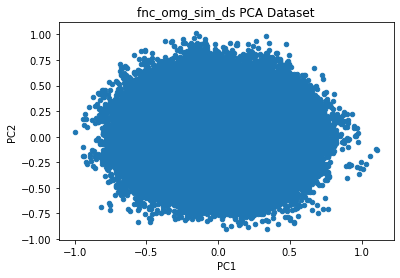

In [194]:
X_pca.plot.scatter(x='PC1', y='PC2', title='fnc_omg_sim_ds PCA Dataset')

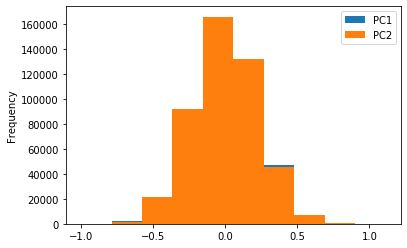

In [195]:
X_pca.plot.hist()

type(fnc_omg_sim_ds.features): <class 'numpy.ndarray'>
fnc_omg_sim_ds.features: [[ 1.         -0.1745931  -0.14668377 ...  1.         -0.15118515
   1.        ]
 [ 1.          0.16827016  0.11046061 ...  1.         -0.06231507
   1.        ]
 [ 1.         -0.50772085 -0.0388995  ...  1.          0.26997111
   1.        ]
 ...
 [ 1.          0.60522456 -0.20970329 ...  1.         -0.00873832
   1.        ]
 [ 1.         -0.3264642   0.01403594 ...  1.          0.03176851
   1.        ]
 [ 1.         -0.32729087  0.07675581 ...  1.         -0.30055139
   1.        ]]


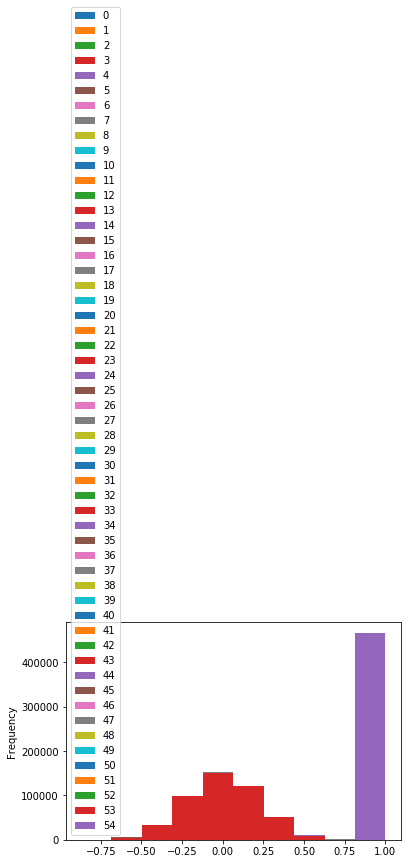

In [196]:
print("type(fnc_omg_sim_ds.features):",type(fnc_omg_sim_ds.features))
print("fnc_omg_sim_ds.features:",fnc_omg_sim_ds.features)
X_pca = pd.DataFrame(fnc_omg_sim_ds.features)
X_pca.sample(5)
X_pca.plot.hist()

type(fnc_omg_sim_ds.labels): <class 'numpy.ndarray'>
fnc_omg_sim_ds.labels: [[1]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


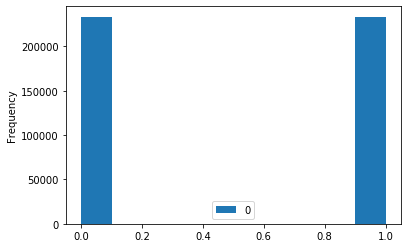

In [197]:
print("type(fnc_omg_sim_ds.labels):",type(fnc_omg_sim_ds.labels))
print("fnc_omg_sim_ds.labels:",fnc_omg_sim_ds.labels)
X_pca = pd.DataFrame(fnc_omg_sim_ds.labels)
X_pca.sample(5)
X_pca.plot.hist()

In [198]:
seed = 0
nclusters = 2
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(fnc_omg_sim_ds.features)
y_cluster_kmeans = km.predict(fnc_omg_sim_ds.features)

In [199]:
score = sklearn.metrics.silhouette_score(fnc_omg_sim_ds.features, y_cluster_kmeans)
print("score:",score)

score: 0.015258644842111672


In [200]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

y_cluster_kmeans: [0 1 0 ... 1 0 1]
type(y_cluster_kmeans): <class 'numpy.ndarray'>
y_cluster_kmeans.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score: 2.7060322939405693e-06


In [201]:
nclusters=2
gmm_sim_2 = GaussianMixture(n_components=nclusters)

In [202]:
gmm_sim_2.fit(fnc_omg_sim_ds.features,fnc_omg_sim_ds.labels)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [203]:
gmm_sim_pred_2 = gmm_sim_2.predict(fnc_omg_sim_ds.features)

In [204]:
print("gmm_sim_pred_2:",gmm_sim_pred_2)
print("type(gmm_sim_pred_2):",type(gmm_sim_pred_2))
print("gmm_sim_pred_2.shape:",gmm_sim_pred_2.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_2)
print("score:",score)

gmm_sim_pred_2: [1 0 0 ... 1 1 0]
type(gmm_sim_pred_2): <class 'numpy.ndarray'>
gmm_sim_pred_2.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score: 5.51184452733038e-07


In [206]:
score = sklearn.metrics.silhouette_score(fnc_omg_sim_ds.features, gmm_sim_pred_2)
print("score:",score)

score: 0.013336356556542302


In [207]:
nclusters=5
gmm_sim = GaussianMixture(n_components=nclusters)
gmm_sim.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [208]:
gmm_sim_pred = gmm_sim.predict(fnc_omg_sim_ds.features)

In [209]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

gmm_sim_pred: [0 0 2 ... 4 3 2]
type(gmm_sim_pred): <class 'numpy.ndarray'>
gmm_sim_pred.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score: 4.694144869128984e-05


In [210]:
nclusters=15
gmm_sim_15 = GaussianMixture(n_components=nclusters)
gmm_sim_15.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=15, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [211]:
gmm_sim_pred_15 = gmm_sim_15.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_15:",gmm_sim_pred_15)
print("type(gmm_sim_pred_15):",type(gmm_sim_pred_15))
print("gmm_sim_pred_15.shape:",gmm_sim_pred_15.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_15 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_15)
print("score_15:",score_15)

gmm_sim_pred_15: [ 6 10  8 ... 10  6 14]
type(gmm_sim_pred_15): <class 'numpy.ndarray'>
gmm_sim_pred_15.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_15: 1.300162729493868e-05


In [212]:
nclusters=25
gmm_sim_25 = GaussianMixture(n_components=nclusters)
gmm_sim_25.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=25, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [213]:
gmm_sim_pred_25 = gmm_sim_25.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_25:",gmm_sim_pred_25)
print("type(gmm_sim_pred_25):",type(gmm_sim_pred_25))
print("gmm_sim_pred_25.shape:",gmm_sim_pred_25.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_25 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_25)
print("score_25:",score_25)

gmm_sim_pred_25: [ 8  2  6 ... 22  4 11]
type(gmm_sim_pred_25): <class 'numpy.ndarray'>
gmm_sim_pred_25.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_25: 2.5309679063795965e-05


In [214]:
nclusters=35
gmm_sim_35 = GaussianMixture(n_components=nclusters)
gmm_sim_35.fit(fnc_omg_sim_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=35, n_init=1,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [215]:
gmm_sim_pred_35 = gmm_sim_35.predict(fnc_omg_sim_ds.features)
print("gmm_sim_pred_35:",gmm_sim_pred_35)
print("type(gmm_sim_pred_35):",type(gmm_sim_pred_35))
print("gmm_sim_pred_35.shape:",gmm_sim_pred_35.shape)
print("fnc_omg_sim_ds.labels.shape:",fnc_omg_sim_ds.labels.shape)
score_35 = adjusted_rand_score(fnc_omg_sim_ds.labels[:,0], gmm_sim_pred_35)
print("score_35:",score_35)

gmm_sim_pred_35: [11  8 17 ... 32 19 14]
type(gmm_sim_pred_35): <class 'numpy.ndarray'>
gmm_sim_pred_35.shape: (466944,)
fnc_omg_sim_ds.labels.shape: (466944, 1)
score_35: 2.5820544719115612e-05


In [216]:
print("skl_moon_ds.features.shape:",skl_moon_ds.features.shape)
print("skl_moon_ds.labels.shape:",skl_moon_ds.labels.shape)
print("skl_moon_ds.features:",skl_moon_ds.features)
print("skl_moon_ds.labels:",skl_moon_ds.labels)

skl_moon_ds.features.shape: (10000, 2)
skl_moon_ds.labels.shape: (10000, 1)
skl_moon_ds.features: [[ 0.97609201  0.18095167]
 [ 0.38567065 -0.29911966]
 [ 0.63210545 -0.43652298]
 ...
 [-0.15820732  0.99691421]
 [ 0.2660406  -0.18557373]
 [ 0.8097791  -0.48901083]]
skl_moon_ds.labels: [[0]
 [1]
 [1]
 ...
 [0]
 [1]
 [1]]


In [217]:
seed = 0
nclusters = 2
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_moon_ds.features)
y_cluster_kmeans = km.predict(skl_moon_ds.features)

In [218]:
score = sklearn.metrics.silhouette_score(skl_moon_ds.features, y_cluster_kmeans)
print("score:",score)

score: 0.4936284250949965


In [219]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_moon_ds.labels.shape:",skl_moon_ds.labels.shape)
score = adjusted_rand_score(skl_moon_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

y_cluster_kmeans: [0 0 0 ... 1 1 0]
type(y_cluster_kmeans): <class 'numpy.ndarray'>
y_cluster_kmeans.shape: (10000,)
skl_moon_ds.labels.shape: (10000, 1)
score: 0.2563665892694464


In [220]:
nclusters=2
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [221]:
gmm_sim.fit(skl_moon_ds.features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [222]:
gmm_sim_pred = gmm_sim.predict(skl_moon_ds.features)

In [223]:
score = metrics.silhouette_score(skl_moon_ds.features, gmm_sim_pred)
print("score:",score)

AttributeError: 'str' object has no attribute 'silhouette_score'

In [ ]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("skl_moon_ds.labels.shape:",skl_moon_ds.labels.shape)
score = adjusted_rand_score(skl_moon_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

In [ ]:
print("skl_iris_ds.features.shape:",skl_iris_ds.features.shape)
print("skl_iris_ds.labels.shape:",skl_iris_ds.labels.shape)
print("skl_iris_ds.features:",skl_iris_ds.features)
print("skl_iris_ds.labels:",skl_iris_ds.labels)


In [ ]:
seed = 0
nclusters = 3
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_iris_ds.features)
y_cluster_kmeans = km.predict(skl_iris_ds.features)

In [ ]:
score = sklearn.metrics.silhouette_score(skl_iris_ds.features, y_cluster_kmeans)
print("score:",score)

In [ ]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_iris_ds.labels.shape:",skl_iris_ds.labels.shape)
score = adjusted_rand_score(skl_iris_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

In [ ]:
nclusters=3
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gmm_sim.fit(skl_iris_ds.features)

In [ ]:
gmm_sim_pred = gmm_sim.predict(skl_iris_ds.features)

In [ ]:
score = metrics.silhouette_score(skl_iris_ds.features, gmm_sim_pred)
print("score:",score)

In [ ]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",skl_iris_ds.labels.shape)
score = adjusted_rand_score(skl_iris_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

In [ ]:
print("skl_blobs_ds.features.shape:",skl_blobs_ds.features.shape)
print("skl_blobs_ds.labels.shape:",skl_blobs_ds.labels.shape)
print("skl_blobs_ds.features:",skl_blobs_ds.features)
print("skl_blobs_ds.labels:",skl_blobs_ds.labels)

In [ ]:
seed = 0
nclusters = 3
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_blobs_ds.features)
y_cluster_kmeans = km.predict(skl_blobs_ds.features)

In [ ]:
score = sklearn.metrics.silhouette_score(skl_blobs_ds.features, y_cluster_kmeans)
print("score:",score)

In [ ]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_iris_ds.labels.shape:",skl_blobs_ds.labels.shape)
score = adjusted_rand_score(skl_blobs_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

In [ ]:
nclusters=3
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gmm_sim.fit(skl_blobs_ds.features)

In [ ]:
gmm_sim_pred = gmm_sim.predict(skl_blobs_ds.features)

In [ ]:
score = metrics.silhouette_score(skl_blobs_ds.features, gmm_sim_pred)
print("score:",score)

In [ ]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("fnc_omg_sim_ds.labels.shape:",skl_blobs_ds.labels.shape)
score = adjusted_rand_score(skl_blobs_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

In [ ]:
print("skl_class_ds.skl_class_ds.shape:",skl_class_ds.features.shape)
print("skl_class_ds.skl_class_ds.shape:",skl_class_ds.labels.shape)
print("skl_class_ds.features:",skl_class_ds.features)
print("skl_class_ds.labels:",skl_class_ds.labels)

In [ ]:
seed = 0
nclusters = 2
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_class_ds.features)
y_cluster_kmeans = km.predict(skl_class_ds.features)

In [ ]:
score = sklearn.metrics.silhouette_score(skl_class_ds.features, y_cluster_kmeans)
print("score:",score)

In [ ]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_class_ds.labels.shape:",skl_class_ds.labels.shape)
score = adjusted_rand_score(skl_class_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

In [ ]:
nclusters=2
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gmm_sim.fit(skl_class_ds.features)

In [ ]:
gmm_sim_pred = gmm_sim.predict(skl_class_ds.features)

In [ ]:
score = metrics.silhouette_score(skl_class_ds.features, gmm_sim_pred)
print("score:",score)

In [ ]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("skl_class_ds.labels.shape:",skl_class_ds.labels.shape)
score = adjusted_rand_score(skl_class_ds.labels[:,0], gmm_sim_pred)
print("score:",score)

In [ ]:
print("skl_mnist_ds.features.shape:",skl_mnist_ds.features.shape)
print("skl_mnist_ds.labels.shape:",skl_mnist_ds.labels.shape)
print("skl_mnist_ds.features:",skl_mnist_ds.features)
print("skl_mnist_ds.labels:",skl_mnist_ds.labels)

In [ ]:
seed = 0
nclusters = 10
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(skl_mnist_ds.features)
y_cluster_kmeans = km.predict(skl_mnist_ds.features)

In [ ]:
score = sklearn.metrics.silhouette_score(skl_mnist_ds.features, y_cluster_kmeans)
print("score:",score)

In [ ]:
print("y_cluster_kmeans:",y_cluster_kmeans)
print("type(y_cluster_kmeans):",type(y_cluster_kmeans))
print("y_cluster_kmeans.shape:",y_cluster_kmeans.shape)
print("skl_mnist_ds.labels.shape:",skl_mnist_ds.labels.shape)
score = adjusted_rand_score(skl_mnist_ds.labels[:,0], y_cluster_kmeans)
print("score:",score)

In [ ]:
nclusters=10
gmm_sim = GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=nclusters, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
gmm_sim.fit(skl_mnist_ds.features)

In [ ]:
gmm_sim_pred = gmm_sim.predict(skl_mnist_ds.features)

In [ ]:
score = metrics.silhouette_score(skl_mnist_ds.features, gmm_sim_pred)
print("score:",score)

In [ ]:
print("gmm_sim_pred:",gmm_sim_pred)
print("type(gmm_sim_pred):",type(gmm_sim_pred))
print("gmm_sim_pred.shape:",gmm_sim_pred.shape)
print("skl_mnist_ds.labels.shape:",skl_mnist_ds.labels.shape)
score = adjusted_rand_score(skl_mnist_ds.labels[:,0], gmm_sim_pred)
print("score:",score)